<a href="https://colab.research.google.com/github/Huygens123/Gender-Based-iolence/blob/main/Movie_ratings_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [5]:
movies_df = pd.read_csv('movies.csv')

movies_df.shape

(9742, 3)

In [7]:
ratings_df = pd.read_csv('ratings.csv')

ratings_df.shape

(85271, 4)

In [8]:
ratings_df.userId.nunique()

554

In [9]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [10]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0
...,...,...,...,...
85266,554,2243,3.0,944902081.0
85267,554,2282,5.0,944902251.0
85268,554,2324,5.0,944898992.0
85269,554,2396,5.0,944898992.0


In [11]:
movie_rate_df = movies_df.merge(ratings_df, on='movieId', how='outer')

movie_rate_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...
86251,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
86252,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
86253,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
86254,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


In [12]:
movie_rate_df.groupby('title')['rating'].sum().sort_values(ascending=False)

title
Shawshank Redemption, The (1994)      1268.5
Forrest Gump (1994)                   1212.5
Pulp Fiction (1994)                   1144.5
Matrix, The (1999)                    1038.0
Silence of the Lambs, The (1991)      1029.5
                                       ...  
Love, Simon (2018)                       0.0
Twentieth Century (1934)                 0.0
Love, Rosie (2014)                       0.0
Love and Other Catastrophes (1996)       0.0
'71 (2014)                               0.0
Name: rating, Length: 9737, dtype: float64

<Axes: ylabel='Frequency'>

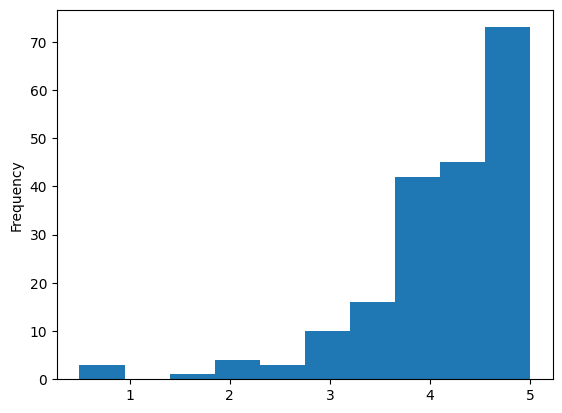

In [13]:
movie_rate_df[movie_rate_df.title == 'Fight Club (1999)'].rating.plot(kind='hist')

In [14]:
movieid_group = movie_rate_df.groupby('movieId')['rating'].agg(['count', 'mean'])
movieid_group

,count,mean
movieId,,
1,188,3.933511
2,94,3.398936
3,46,3.282609
4,6,2.500000
5,45,3.111111
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [15]:
joined_df = movies_df.merge(movieid_group, on='movieId')
joined_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,188,3.933511
1,2,Jumanji (1995),Adventure|Children|Fantasy,94,3.398936
2,3,Grumpier Old Men (1995),Comedy|Romance,46,3.282609
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,6,2.500000
4,5,Father of the Bride Part II (1995),Comedy,45,3.111111
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9739,193585,Flint (2017),Drama,1,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [16]:
filter_rows = joined_df[joined_df['count'] > 50]
filter_rows

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,188,3.933511
1,2,Jumanji (1995),Adventure|Children|Fantasy,94,3.398936
5,6,Heat (1995),Action|Crime|Thriller,88,3.943182
9,10,GoldenEye (1995),Action|Adventure|Thriller,116,3.478448
10,11,"American President, The (1995)",Comedy|Drama|Romance,59,3.720339
...,...,...,...,...,...
7372,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,130,4.065385
7693,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,60,3.800000
7768,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,67,3.977612
8063,99114,Django Unchained (2012),Action|Drama|Western,64,3.937500


In [17]:
max_title = filter_rows.loc[filter_rows['count'].idxmax(), 'title']
max_ti = filter_rows[filter_rows['title'] == max_title]
max_ti

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,290,4.181034


In [18]:
filter_rows.sort_values(by='count', ascending=False).head(5)

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,290,4.181034
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,287,4.419861
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,274,4.177007
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,250,4.152000
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,248,4.151210


In [19]:
filter_rows[filter_rows.genres.str.contains('Sci-Fi')].sort_values(by='count',
                                                                  ascending=False).head(3)

,movieId,title,genres,count,mean
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,250,4.152000
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,224,4.216518
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,211,3.722749


In [22]:
link_df = pd.read_csv('links.csv')
link_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [23]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'itemprop' : 'ratingValue'})

    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
ratings =[scrapper(rating) for rating in link_df.imdbId]

In [ ]:
rate = pd.concate(link_df.movieId, ratings, names=['moveId', 'ratings', names=['moveId', 'ratings']])

In [ ]:
rate.sort_values(by='ratings', ascending=False).head(1)

In [ ]:
joined_df2 = movies_df.merge(rate, on='movieId')

joined_df2[joined_df2.genres.str.contains('Sci-Fi')].sort_values(by='ratings',
                                                                  ascending=False).head(3)